# <center>Digit Recognizer<center>

O objetivo deste trabalho é apresentar uma solução para a competição Digit Recognizer do Kaggle utilizando Redes Neurais Artificiais. 

Mais informações sobre a competição em https://www.kaggle.com/competitions/digit-recognizer/overview

In [1]:
# Algumas importações básicas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense , BatchNormalization
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint , EarlyStopping
from IPython.display import Image

# <center>Leitura dos dados<center>

In [2]:
# Lendo o arquivo de treino

train = pd.read_csv('MNIST_train.csv')

In [3]:
# Dimensão do dataset de treino

train.shape

(42000, 785)

In [4]:
# Observando um pouco dos dados de treino

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Observando se existem valores faltantes

train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
# Não existem !

sum(train.isnull().sum())

0

In [7]:
# Lendo o arquivo de teste

test = pd.read_csv('MNIST_test.csv')

In [8]:
# Dimensão dos dados de teste

test.shape

(28000, 784)

In [9]:
# Sem valores ausentes no conjunto de teste !

sum(test.isnull().sum())

0

In [10]:
y_train = np.array(train['label'])
X_train = train.drop('label' , axis = 1)

In [11]:
# One-Hot-Encoding

lista = [0]*10
y_train_encoding = []
for i in y_train:
    lista[i] = 1
    y_train_encoding.append(lista)
    lista = 10*[0]

In [12]:
y_train_encoding = np.array(y_train_encoding)

In [13]:
y_train_encoding

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

# <center>Rede Neural Artificial<center>

In [14]:
# Construindo a rede

model = Sequential()
model.add(Dense(350 , activation = 'relu' , input_shape = (784 , )))
model.add(BatchNormalization())
model.add(Dense(200 , activation = 'relu' ))
model.add(BatchNormalization())
model.add(Dense(100 , activation = 'relu' ))
model.add(BatchNormalization())
model.add(Dense(50 , activation = 'relu' ))
model.add(BatchNormalization())
model.add(Dense(25 , activation = 'relu' ))
model.add(BatchNormalization())
model.add(Dense(10 , activation = 'relu' ))
model.add(BatchNormalization())
model.add(Dense(10 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

<p style='text-align: justify;'>A rede neural construída acima possui 7 camadas densas e em todas essas camadas com exceção da última a função de ativação é a relu. Na última camada a função de ativação é a softmax, pois nossa tarefa é uma tarefa de classificação multicategoria e essa função fornecerá a probabilidade de cada classe. Por fim, o otimizador escolhido é o adam.

In [15]:
# Criando um checkpoint para salvar os pesos do modelo que levam a maior acurácia de validação

checkpoint = ModelCheckpoint('weights.hdf5' , monitor = 'val_accuracy' , save_best_only = True )

In [16]:
# Obrigando o modelo a parar quando se passarem 5 épocas sem aumentar o valor da acurácia de validaçao

early_stopping = EarlyStopping(monitor = 'val_accuracy' , patience = 5)

In [17]:
# Treinando a rede neural

history = model.fit(X_train , y_train_encoding, epochs = 40 , validation_split = 0.2 , callbacks = [checkpoint, early_stopping])

Epoch 1/40
1050/1050 [==============================] - 45s 35ms/step - loss: 0.5424 - accuracy: 0.8588 - val_loss: 0.1716 - val_accuracy: 0.9517
Epoch 2/40
1050/1050 [==============================] - 38s 36ms/step - loss: 0.2201 - accuracy: 0.9365 - val_loss: 0.1489 - val_accuracy: 0.9565
Epoch 3/40
1050/1050 [==============================] - 33s 31ms/step - loss: 0.1636 - accuracy: 0.9521 - val_loss: 0.1160 - val_accuracy: 0.9676
Epoch 4/40
1050/1050 [==============================] - 34s 32ms/step - loss: 0.1295 - accuracy: 0.9619 - val_loss: 0.1165 - val_accuracy: 0.9654
Epoch 5/40
1050/1050 [==============================] - 34s 33ms/step - loss: 0.1133 - accuracy: 0.9662 - val_loss: 0.1292 - val_accuracy: 0.9632
Epoch 6/40
1050/1050 [==============================] - 32s 30ms/step - loss: 0.1035 - accuracy: 0.9695 - val_loss: 0.0997 - val_accuracy: 0.9723
Epoch 7/40
1050/1050 [==============================] - 33s 31ms/step - loss: 0.0859 - accuracy: 0.9737 - val_loss: 0.0940 -

In [18]:
# Maior valor da acurácia de validação

max(history.history['val_accuracy'])

0.9795238375663757

In [19]:
# Salvando os pesos que geram a maior acurácia de validação

model.load_weights('weights.hdf5')

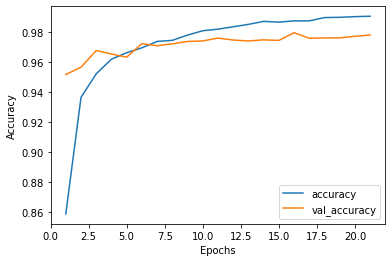

In [21]:
plt.plot(list(range(1 , 22, 1)) , history.history['accuracy'] , label = 'accuracy')
plt.plot(list(range(1 , 22, 1)) , history.history['val_accuracy'] , label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# <center>Submission<center>

In [22]:
X_test = np.array(test)

In [23]:
predictions = np.argmax(model.predict(X_test), axis=-1)

875/875 [==============================] - 13s 14ms/step


In [24]:
test['Label'] = predictions
test['ImageId'] = list(range(1, 28001 , 1))

In [25]:
test[['ImageId' , 'Label']].to_csv('submission.csv' , index = False)

Essa submissão nos gerou um score de 0.97685 no Kaggle e, portanto, está em linha com a nossa validação.